# Toxic Comment Analysis

This notebook analyzes the toxic comment dataset which includes multiple toxicity labels (toxic, severe_toxic, obscene, threat, insult, identity_hate).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
# Set style for visualizations
plt.style.use('default')
sns.set_theme()

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
# Project root directory
DATASETS_DIR = Path('../datasets/raw/toxic_comment_data')

## 1. Data Loading and Initial Exploration

In [6]:
# Read toxic comment datasets
train_df = pd.read_csv(DATASETS_DIR / 'train.csv')
test_df = pd.read_csv(DATASETS_DIR / 'test.csv')
test_labels_df = pd.read_csv(DATASETS_DIR / 'test_labels.csv')

print("Dataset Overview:")
print("-" * 50)
print(f"Training set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

print("\nColumns in training data:")
print(train_df.columns.tolist())

print("\nSample of training data:")
print(train_df.head())

Dataset Overview:
--------------------------------------------------
Training set size: 159571
Test set size: 153164

Columns in training data:
['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

Sample of training data:
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0

In [7]:
train_df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [8]:
#unique values of columns toxic, severe_toxic, obscene, threat, insult, identity hate
print(train_df['toxic'].unique())
print(train_df['severe_toxic'].unique())
print(train_df['obscene'].unique())
print(train_df['threat'].unique())
print(train_df['insult'].unique())
print(train_df['identity_hate'].unique())


[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [9]:
train_df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [10]:
train_df['comment_text'][2]

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [11]:
lens = train_df.comment_text.str.len()
lens.mean(), lens.std(), lens.max()

(np.float64(394.0732213246768), np.float64(590.7202819048919), np.int64(5000))

In [12]:
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


we can see that there are some comments with no toxicity, we will add a lable none to them

In [13]:
toxicity_types = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train_df['none'] = 1-train_df[toxicity_types].max(axis=1)
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.898321
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Label Distribution Analysis

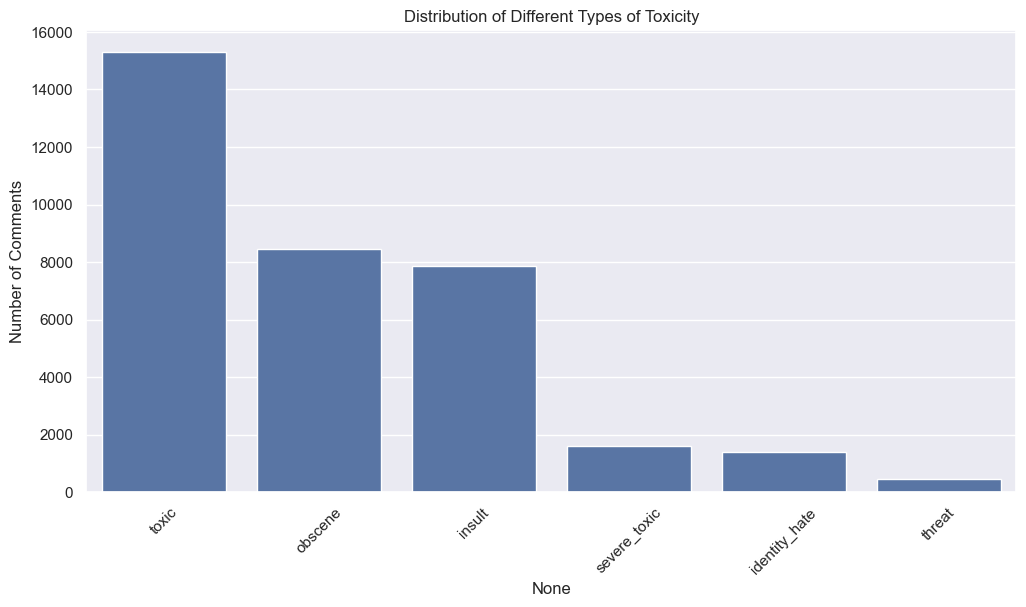


Percentage of comments in each category:
toxic: 9.58%
severe_toxic: 1.00%
obscene: 5.29%
threat: 0.30%
insult: 4.94%
identity_hate: 0.88%


In [14]:
# Plot distribution of each toxicity type
plt.figure(figsize=(12, 6))
toxicity_counts = train_df[toxicity_types].sum().sort_values(ascending=False)
sns.barplot(x=toxicity_counts.index, y=toxicity_counts.values)
plt.title('Distribution of Different Types of Toxicity')
plt.xticks(rotation=45)
plt.ylabel('Number of Comments')
plt.show()

# Print percentages
print("\nPercentage of comments in each category:")
for col in toxicity_types:
    percentage = (train_df[col].sum() / len(train_df)) * 100
    print(f"{col}: {percentage:.2f}%")

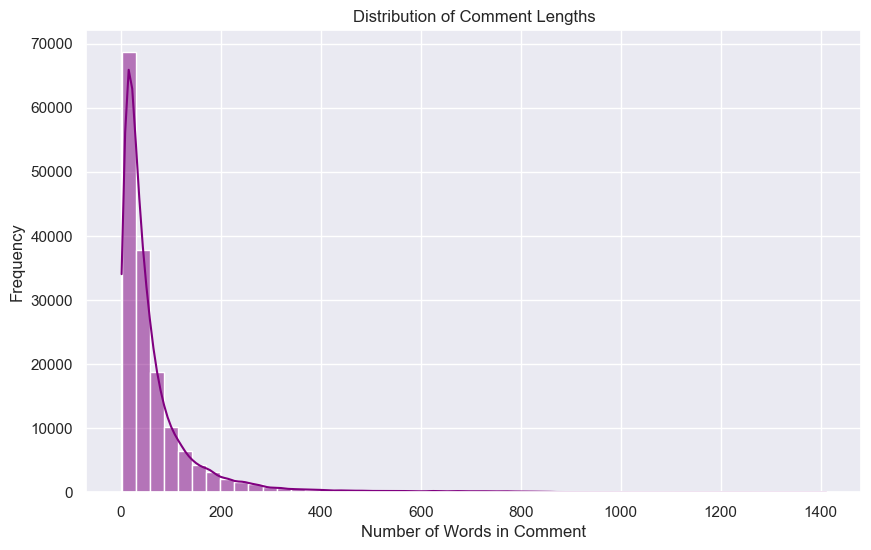

In [21]:
df = train_df.copy()
df['comment_length'] = df['comment_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['comment_length'], bins=50, kde=True, color='purple')
plt.title("Distribution of Comment Lengths")
plt.xlabel("Number of Words in Comment")
plt.ylabel("Frequency")

plt.show()

## 3. Multi-Label Analysis

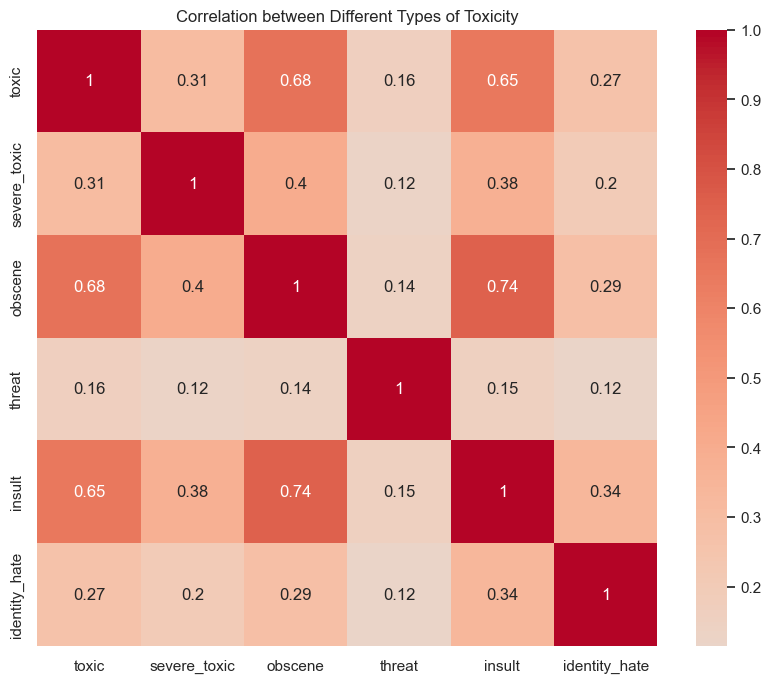

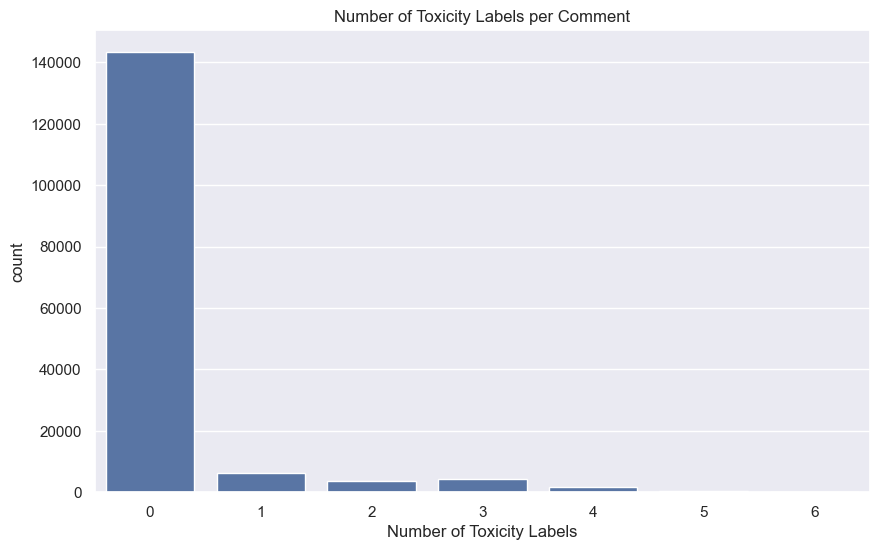

In [15]:
# Calculate correlation between different toxicity types
plt.figure(figsize=(10, 8))
correlation_matrix = train_df[toxicity_types].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Different Types of Toxicity')
plt.show()

# Calculate number of toxicity labels per comment
train_df['toxicity_count'] = train_df[toxicity_types].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='toxicity_count')
plt.title('Number of Toxicity Labels per Comment')
plt.xlabel('Number of Toxicity Labels')
plt.show()

## 4. Text Length Analysis

<Figure size 1200x600 with 0 Axes>

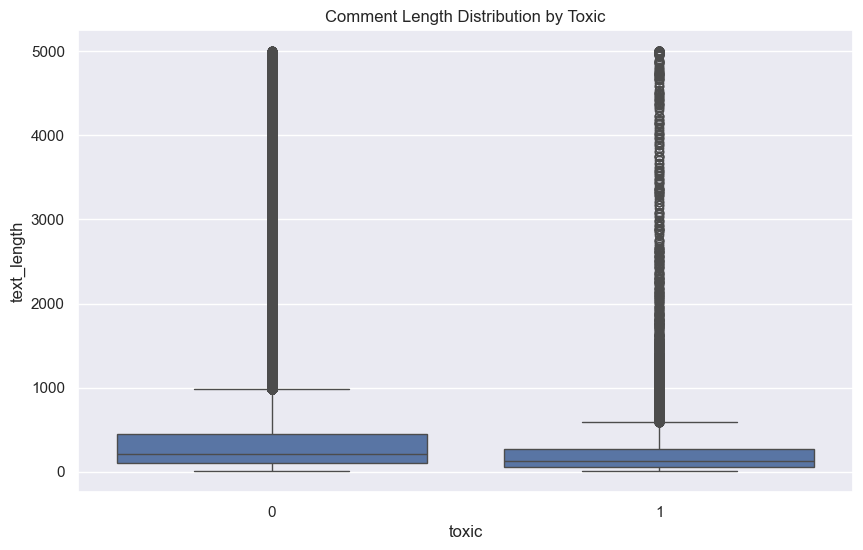


Text Length Statistics for toxic:
          count        mean         std  min    25%    50%    75%     max
toxic                                                                    
0      144277.0  404.549339  586.850889  6.0  102.0  216.0  453.0  5000.0
1       15294.0  295.246044  617.379025  8.0   59.0  123.0  271.0  5000.0


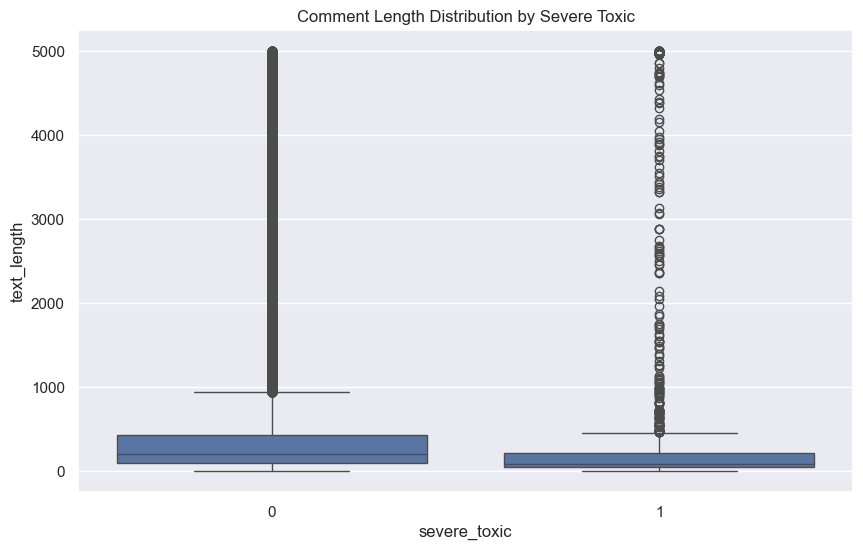


Text Length Statistics for severe_toxic:
                 count        mean          std  min   25%    50%    75%  \
severe_toxic                                                               
0             157976.0  393.471856   583.461675  6.0  97.0  207.0  437.0   
1               1595.0  453.635110  1090.988943  8.0  49.0   94.0  216.0   

                 max  
severe_toxic          
0             5000.0  
1             5000.0  


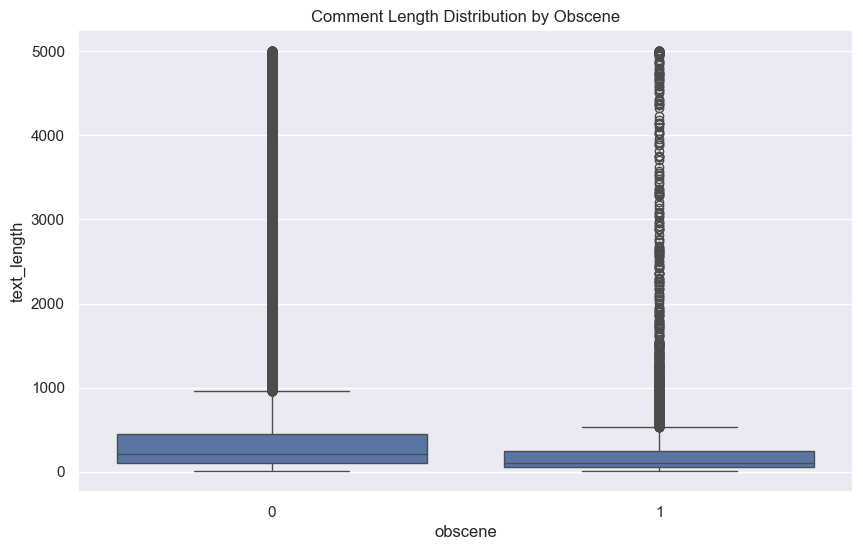


Text Length Statistics for obscene:
            count        mean         std  min    25%    50%    75%     max
obscene                                                                    
0        151122.0  400.071551  587.200849  6.0  100.0  212.0  446.0  5000.0
1          8449.0  286.784827  641.088349  8.0   53.0  110.0  246.0  5000.0


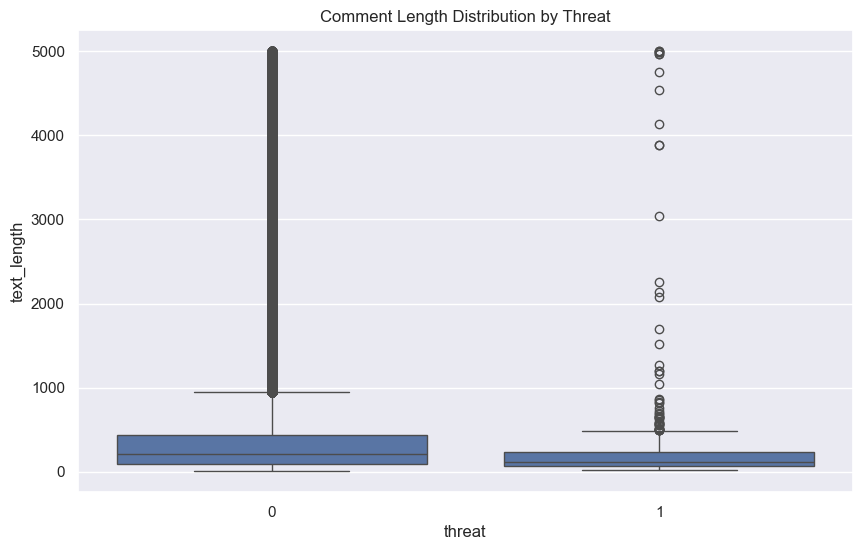


Text Length Statistics for threat:
           count        mean         std   min    25%    50%    75%     max
threat                                                                     
0       159093.0  394.332610  590.235326   6.0  96.00  206.0  436.0  5000.0
1          478.0  307.740586  730.208700  19.0  67.25  121.0  234.5  5000.0


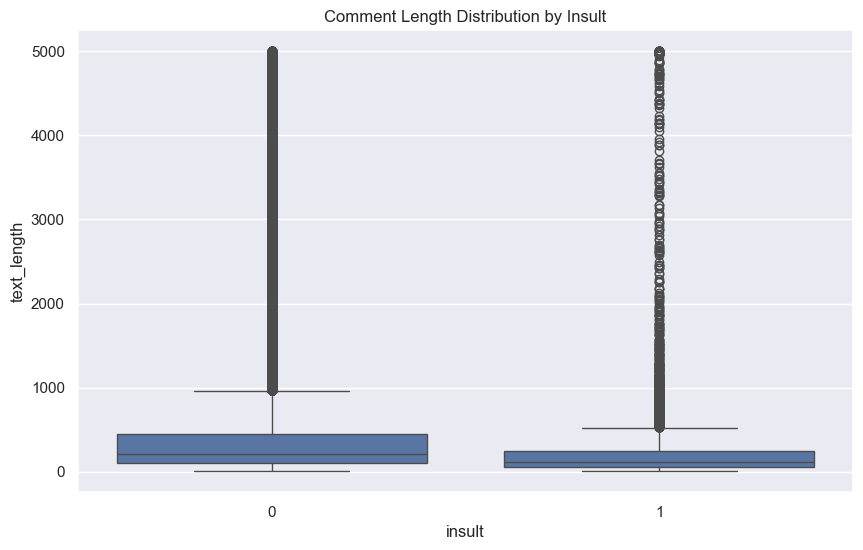


Text Length Statistics for insult:
           count        mean         std  min   25%    50%    75%     max
insult                                                                   
0       151694.0  400.137685  588.390038  6.0  99.0  212.0  446.0  5000.0
1         7877.0  277.284753  622.546879  8.0  55.0  112.0  243.0  5000.0


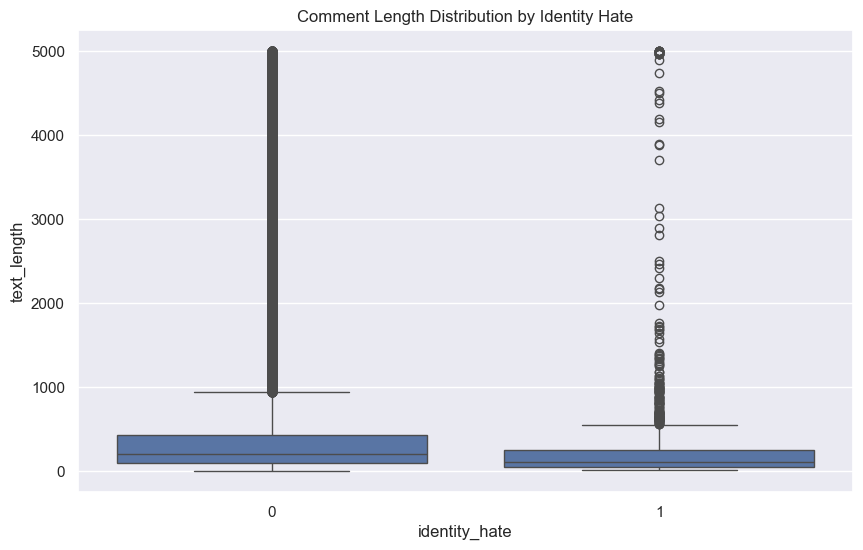


Text Length Statistics for identity_hate:
                  count        mean         std   min   25%    50%    75%  \
identity_hate                                                               
0              158166.0  394.833011  589.693503   6.0  96.0  206.0  437.0   
1                1405.0  308.540925  691.629391  18.0  57.0  114.0  258.0   

                  max  
identity_hate          
0              5000.0  
1              5000.0  


In [16]:
# Add text length
train_df['text_length'] = train_df['comment_text'].str.len()

# Compare text lengths between toxic and non-toxic comments
plt.figure(figsize=(12, 6))
for toxicity_type in toxicity_types:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_df, x=toxicity_type, y='text_length')
    plt.title(f'Comment Length Distribution by {toxicity_type.replace("_", " ").title()}')
    plt.show()
    
    print(f"\nText Length Statistics for {toxicity_type}:")
    print(train_df.groupby(toxicity_type)['text_length'].describe())

## 5. Common Words Analysis

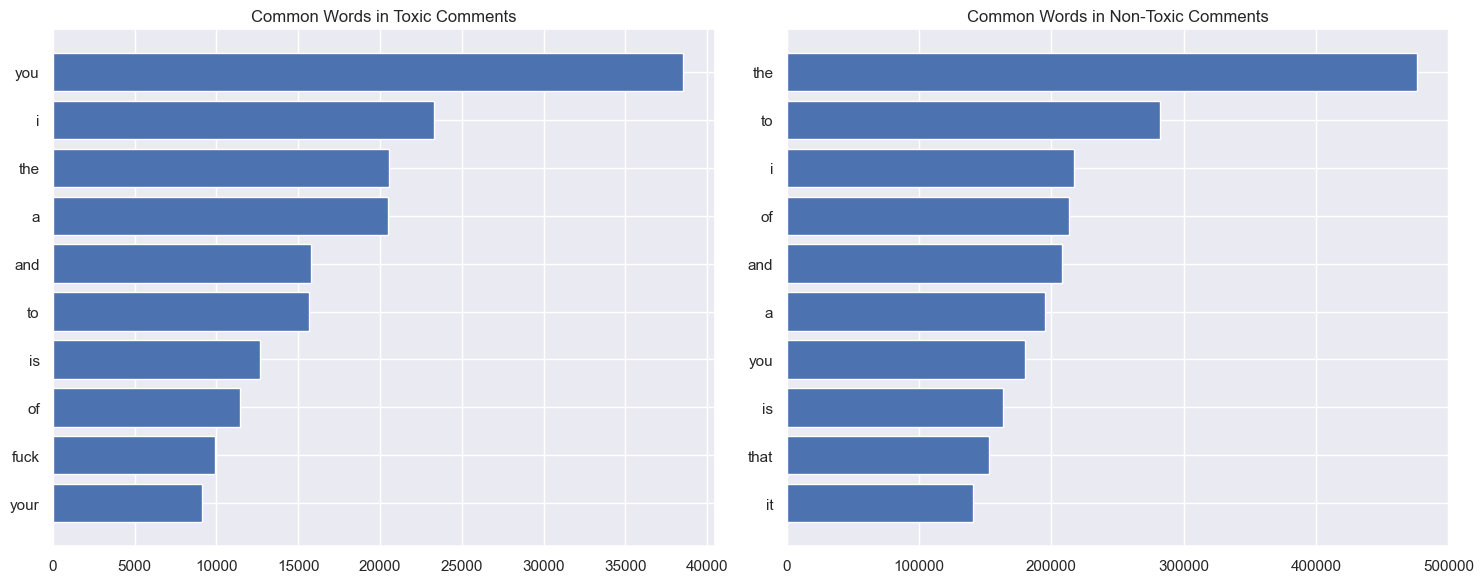

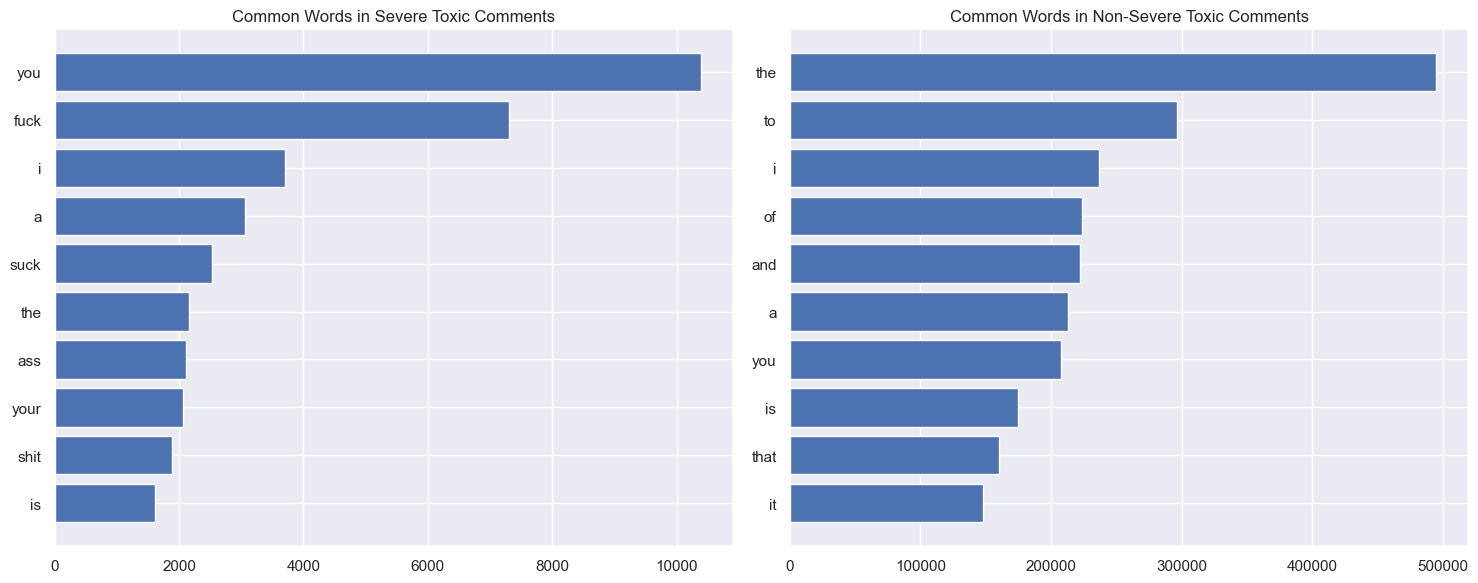

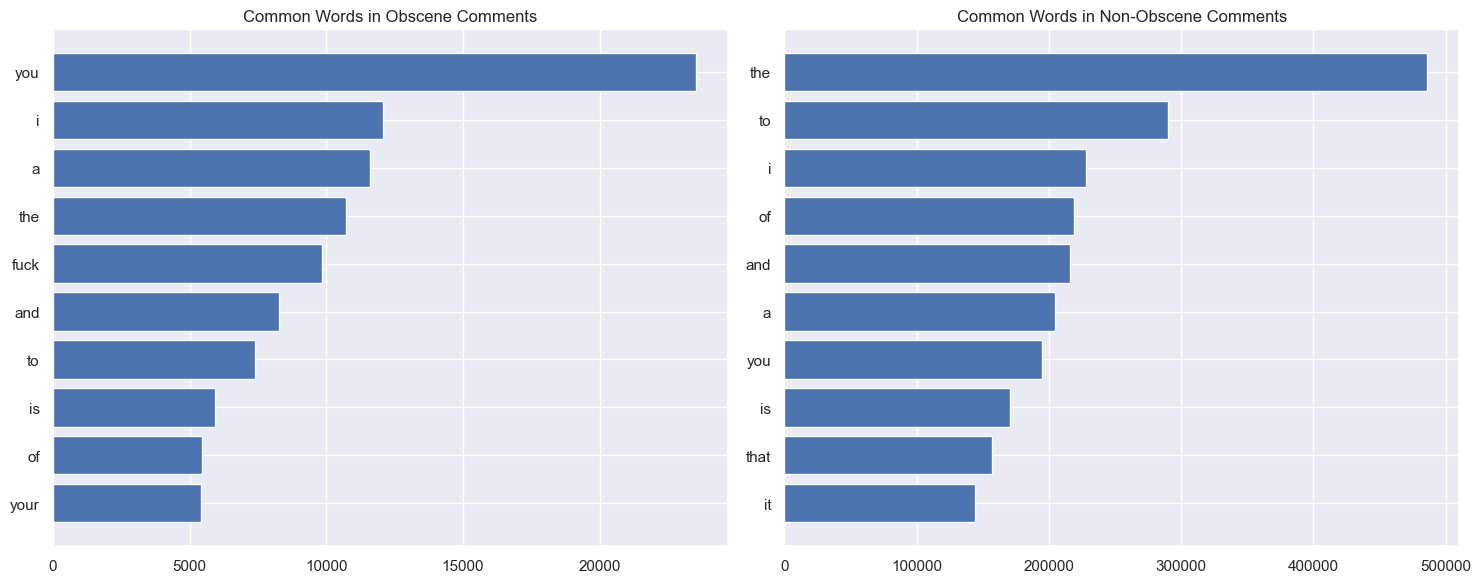

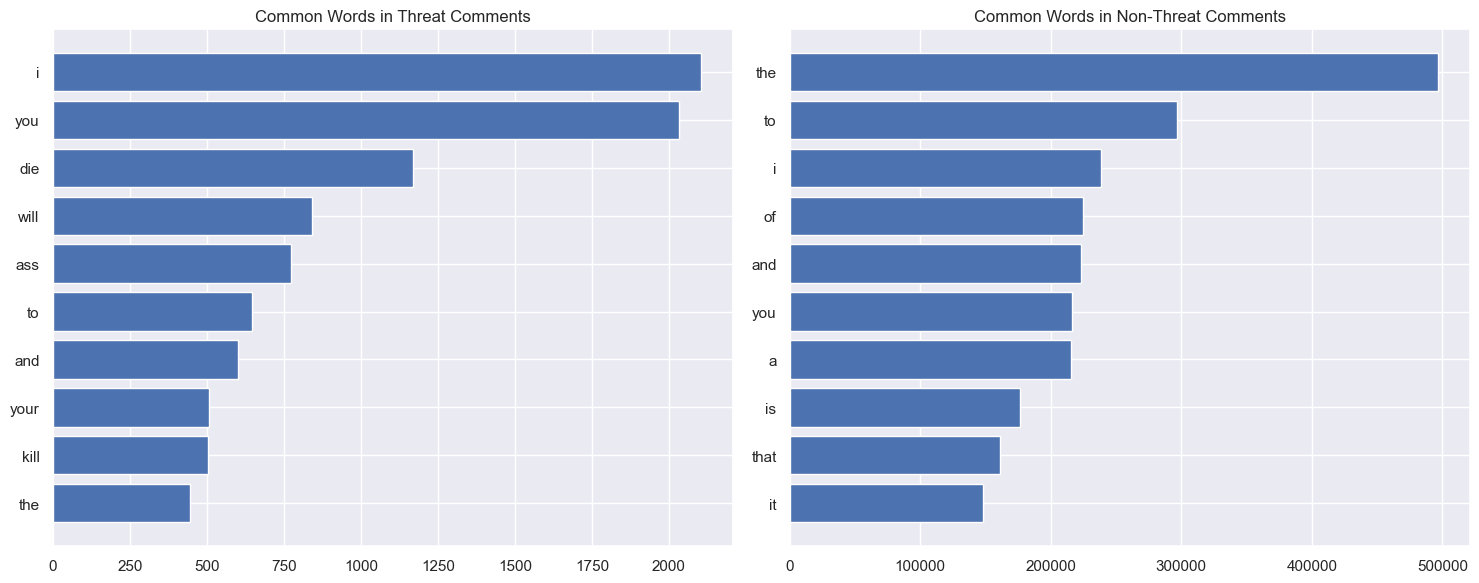

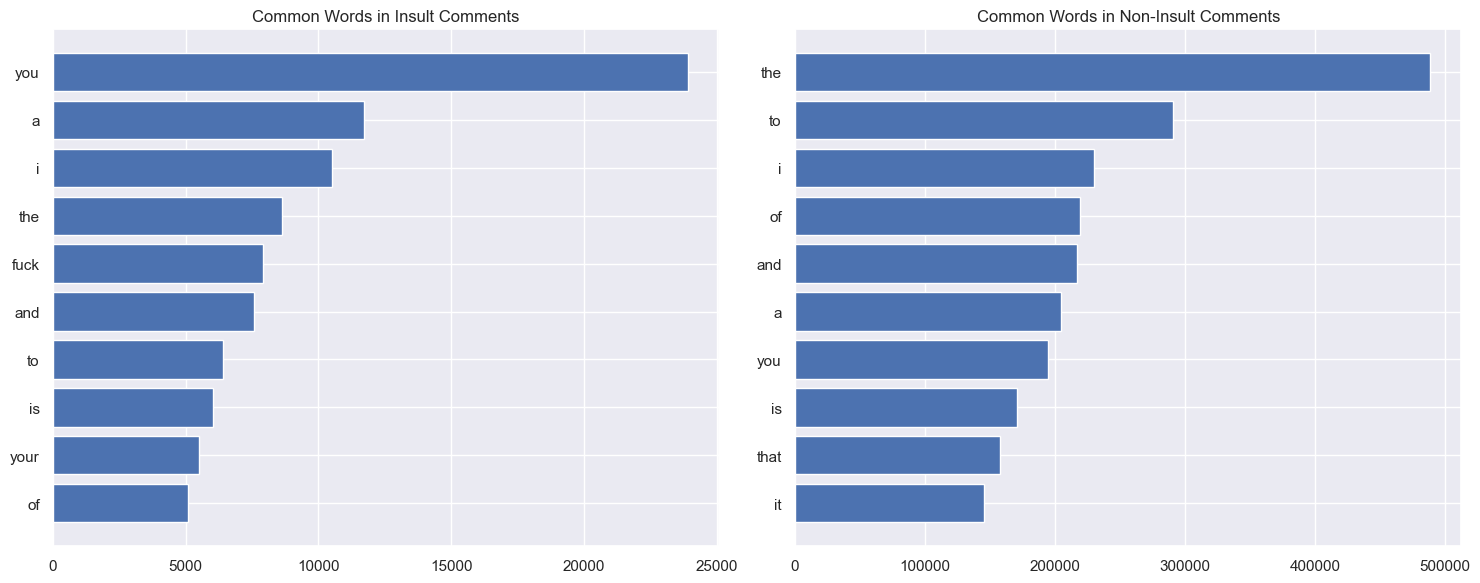

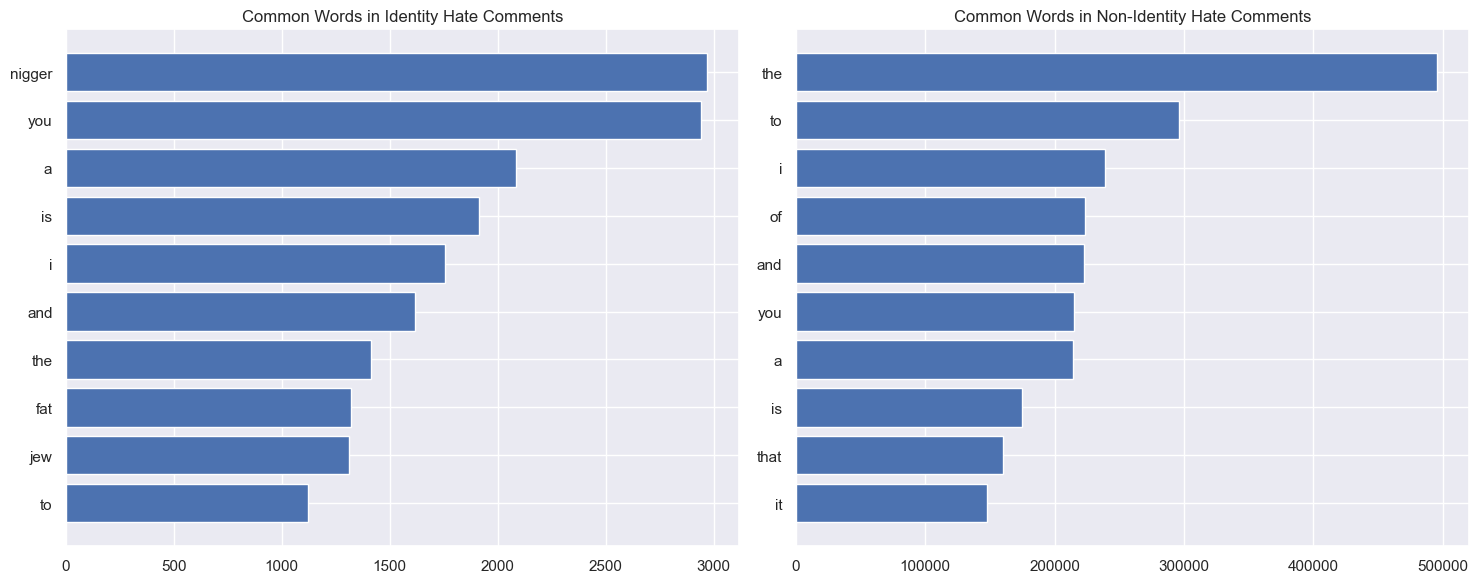

In [17]:
from collections import Counter
import re

def get_common_words(text_series, n=20):
    # Combine all text
    text = ' '.join(text_series.astype(str))
    # Convert to lowercase and split into words
    words = re.findall(r'\w+', text.lower())
    # Get most common words
    return Counter(words).most_common(n)

# Analyze common words in toxic vs non-toxic comments
for toxicity_type in toxicity_types:
    toxic_words = get_common_words(train_df[train_df[toxicity_type] == 1]['comment_text'])
    non_toxic_words = get_common_words(train_df[train_df[toxicity_type] == 0]['comment_text'])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot for toxic comments
    words, counts = zip(*toxic_words[:10])
    ax1.barh(words[::-1], counts[::-1])
    ax1.set_title(f'Common Words in {toxicity_type.replace("_", " ").title()} Comments')
    
    # Plot for non-toxic comments
    words, counts = zip(*non_toxic_words[:10])
    ax2.barh(words[::-1], counts[::-1])
    ax2.set_title(f'Common Words in Non-{toxicity_type.replace("_", " ").title()} Comments')
    
    plt.tight_layout()
    plt.show()

In [18]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,none,toxicity_count,text_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,0,67


In [19]:
train_df.drop(['id', 'toxicity_count','text_length'], axis=1, inplace=True)

In [20]:
# Create the processed directory if it doesn't exist
import os
os.makedirs('../datasets/processed', exist_ok=True)

In [21]:
# Save processed data
train_df.to_csv('../datasets/processed/toxic_comments_relevant_data.csv', index=False)